<a href="https://colab.research.google.com/github/sturu1/FRI/blob/master/2020_07_20_%EC%98%A4%ED%9B%84%EC%88%98%EC%97%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('fivethirteight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, Bidirectional, Dropout
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [19]:
#포맷 세팅이 중요 계속 사용하기때문에
def plot_predictions(test, predicted):
  plt.plot(test, color = 'red', label='Real IBM Stock Price')
  plt.plot(predicted, color='blue', label='Predicted IBM Stock Price')
  plt.title('IBM Stock Price Prediction')
  plt.xlabel('Time')
  plt.ylabel('IBM Stock Price')
  plt.legend()
  plt.show()

In [20]:
#숫자로
def return_rmse(test, predicted):
  rmse = math.sqrt(mean_squared_error(test, predicted))
  print('The root mean squared error is {}'.format(rmse))

In [21]:
#드라이브 마운드 하기
dataset = pd.read_csv('/content/IBM_2006-01-01_to_2018-01-01.csv', index_col = 'Date', parse_dates= ['Date'])
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [22]:
training_set = dataset[: '2016'].iloc[:, 1:2].values
test_set = dataset['2017':].iloc[:, 1:2].values

In [23]:
training_set.shape

(2769, 1)

In [24]:
test_set.shape

(251, 1)

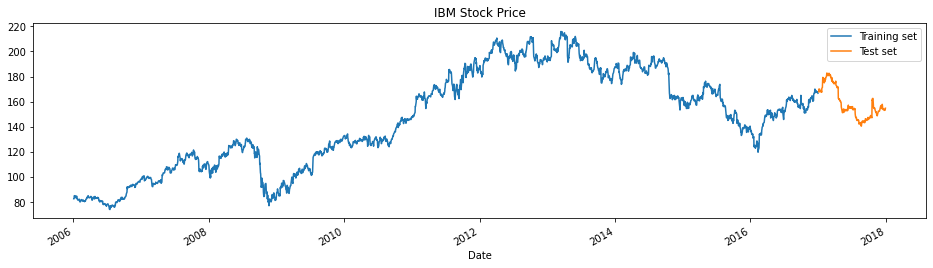

In [25]:
dataset['High'][:'2016'].plot(figsize=(16, 4), legend=True)
dataset['High']['2017':].plot(figsize=(16, 4), legend=True)

plt.legend(['Training set', 'Test set'])
plt.title('IBM Stock Price')
plt.show()

In [26]:
#sc이 중요
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [27]:
X_train = [] #데이터 묶음이라서 X는 대문자임
y_train = [] #y는 데이터 하나라서 소문자임
for i in range(60, 2769):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [28]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) #3차원으로 바꿔야함

In [29]:
#
regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

regressor.compile(optimizer='rmsprop', loss='mean_squared_error')

regressor.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
2709/2709 [==============================] - 13s 5ms/step - loss: 0.0229
Epoch 2/50
2709/2709 [==============================] - 12s 4ms/step - loss: 0.0107
Epoch 3/50
2709/2709 [==============================] - 11s 4ms/step - loss: 0.0081
Epoch 4/50
2709/2709 [==============================] - 11s 4ms/step - loss: 0.0075
Epoch 5/50
2709/2709 [==============================] - 11s 4ms/step - loss: 0.0062
Epoch 6/50
2709/2709 [==============================] - 12s 4ms/step - loss: 0.0056
Epoch 7/50
2709/2709 [==============================] - 12s 4ms/step - loss: 0.0051
Epoch 8/50
2709/2709 [==============================] - 12s 4ms/step - loss: 0.0046
Epoch 9/50
2709/2709 [==============================] - 11s 4ms/step - loss: 0.0041
Epoch 10/50
2709/2709 [==============================] - 12s 4ms/step - loss: 0.0039
Epoch 11/50
2709/2709 [==============================] - 12s 4ms/step - loss: 0.0036
Epoch 12/50
2709/2709 [==============================] - 12s 4ms/step - lo

In [30]:
dataset_total = pd.concat((dataset['High'][:'2016'], dataset['High']['2017':]), axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set)- 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

In [31]:
X_test = []
for i in range(60, 311):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

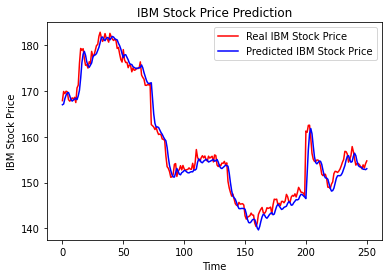

In [32]:
plot_predictions(test_set, predicted_stock_price)

In [33]:
return_rmse(test_set, predicted_stock_price)

The root mean squared error is 2.0632481439818213


# GRU

In [34]:
regressorGRU = Sequential()
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1), activation='tanh'))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1), activation='tanh'))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1), activation='tanh'))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(Dense(units=1))

regressorGRU.compile(optimizer=SGD(learning_rate=0.01, decay=1e-7, momentum=0.9, nesterov=False), loss='mean_squared_error')

In [35]:
regressorGRU.fit(X_train, y_train, epochs=50, batch_size=150)

Epoch 1/50
2709/2709 [==============================] - 8s 3ms/step - loss: 0.1130
Epoch 2/50
2709/2709 [==============================] - 6s 2ms/step - loss: 0.0354
Epoch 3/50
2709/2709 [==============================] - 6s 2ms/step - loss: 0.0086
Epoch 4/50
2709/2709 [==============================] - 6s 2ms/step - loss: 0.0049
Epoch 5/50
2709/2709 [==============================] - 6s 2ms/step - loss: 0.0043
Epoch 6/50
2709/2709 [==============================] - 6s 2ms/step - loss: 0.0037
Epoch 7/50
2709/2709 [==============================] - 6s 2ms/step - loss: 0.0036
Epoch 8/50
2709/2709 [==============================] - 6s 2ms/step - loss: 0.0033
Epoch 9/50
2709/2709 [==============================] - 6s 2ms/step - loss: 0.0034
Epoch 10/50
2709/2709 [==============================] - 6s 2ms/step - loss: 0.0033
Epoch 11/50
2709/2709 [==============================] - 6s 2ms/step - loss: 0.0030
Epoch 12/50
2709/2709 [==============================] - 6s 2ms/step - loss: 0.0028
E

In [36]:
X_test = []
for i in range(60, 311):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

GRU_predicted_stock_price = regressorGRU.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)

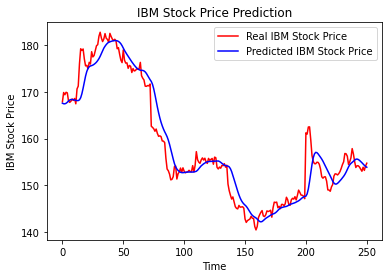

In [37]:
plot_predictions(test_set, GRU_predicted_stock_price)

In [38]:
initial_sequence = X_train[2708,:]
sequence = []
for i in range(251):
  new_prediction = regressorGRU.predict(initial_sequence.reshape(
                                            initial_sequence.shape[1], 
                                            initial_sequence.shape[0],
                                            1))
  initial_sequence = initial_sequence[1:]
  initial_sequence = np.append(initial_sequence, new_prediction, axis=0)
  sequence.append(new_prediction)
sequence = sc.inverse_transform(np.array(sequence).reshape(251, 1))

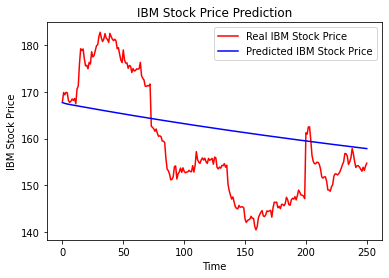

In [39]:
plot_predictions(test_set, sequence)

In [40]:
return_rmse(test_set, sequence)

The root mean squared error is 10.874694026987815
